# Bike sharing challenge

### Author: Tristan Nel

### Date: February 2020

## 1. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import mae, mse

Using TensorFlow backend.


### 1.1 Raw Data

In [2]:
# Raw data
station_data = pd.read_csv('station_data.csv')
trip_data = pd.read_csv('trip_data.csv')
weather_data = pd.read_csv('weather_data.csv')

In [3]:
def preview_raw_data(data_arr):
    for data in data_arr:
        display(data.head())
        display(data.info())

In [4]:
preview_raw_data([station_data, trip_data, weather_data])

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          76 non-null     int64  
 1   Name        76 non-null     object 
 2   Lat         76 non-null     float64
 3   Long        76 non-null     float64
 4   Dock Count  76 non-null     int64  
 5   City        76 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.7+ KB


None

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Trip ID          354152 non-null  int64 
 1   Start Date       354152 non-null  object
 2   Start Station    354152 non-null  int64 
 3   End Date         354152 non-null  object
 4   End Station      354152 non-null  int64 
 5   Subscriber Type  354152 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.2+ MB


None

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1825 non-null   object 
 1   Max TemperatureF           1821 non-null   float64
 2   Mean TemperatureF          1821 non-null   float64
 3   Min TemperatureF           1821 non-null   float64
 4   Max Dew PointF             1775 non-null   float64
 5   MeanDew PointF             1775 non-null   float64
 6   Min DewpointF              1775 non-null   float64
 7   Max Humidity               1775 non-null   float64
 8   Mean Humidity              1775 non-null   float64
 9   Min Humidity               1775 non-null   float64
 10  Max Sea Level PressureIn   1824 non-null   float64
 11  Mean Sea Level PressureIn  1824 non-null   float64
 12  Min Sea Level PressureIn   1824 non-null   float64
 13  Max VisibilityMiles        1820 non-null   float

None

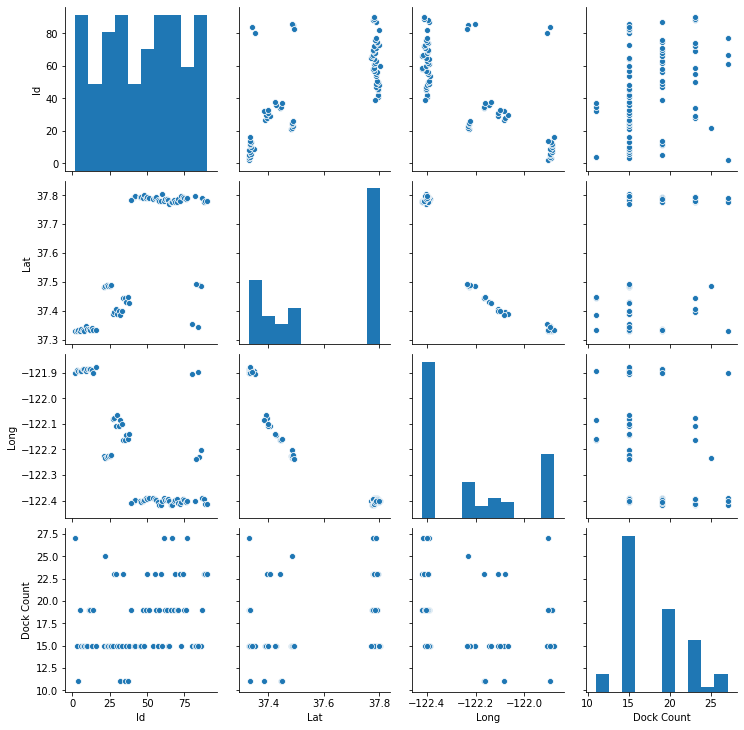

In [5]:
sns.pairplot(station_data)

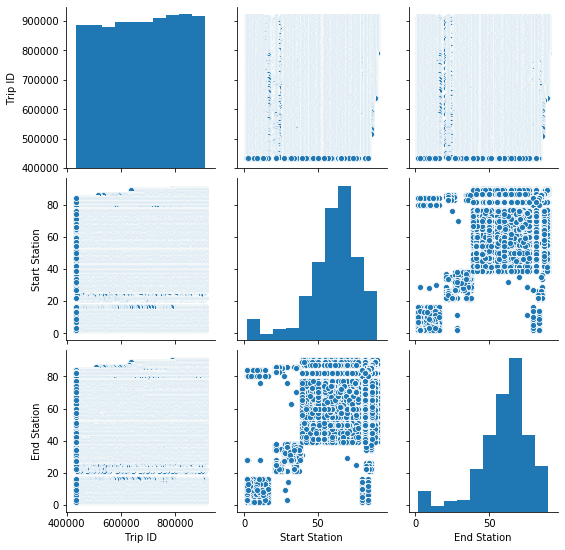

In [6]:
sns.pairplot(trip_data)

In [7]:
#sns.pairplot(weather_data) # Takes too long, resolution too low

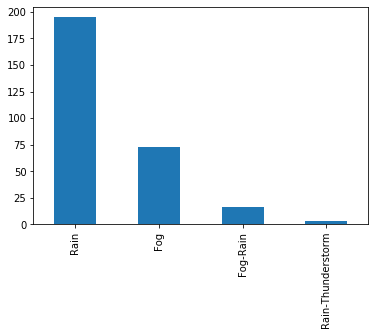

In [8]:
weather_data['Events'].value_counts().plot.bar()

### 1.2 Pre-Processing

The data was provided in three separate components, namely station-, trip- and weather-data, relationally linked by station IDs.

First, the data was pre-processed:

The station IDs in the station data were converted to strings, as they are categorical values, not numerical.

Next, the dates in the trip data were converted to timestamps so that additional data may be extracted, and the start and end stations were again converted to strings for the same reason as above.

Finally, the weather data dates were alrso converted to timestamps, with only the date (day,month,year) extracted, and the meteorological events (categorical data) were encoded with a one-hot encoding. The numerical zip codes were mapped to the associated city names to be used as an relational key for the station data

In [9]:
def get_preprocessed_datasets(station_data, trip_data, weather_data):
    pre_proc_station_data = station_data.copy()
    pre_proc_trip_data = trip_data.copy()
    pre_proc_weather_data = weather_data.copy()
    
    pre_proc_station_data['Id'] = pre_proc_station_data['Id'].astype(str)

    pre_proc_trip_data['Start Date'] = pd.to_datetime(pre_proc_trip_data['Start Date'])
    pre_proc_trip_data['End Date'] = pd.to_datetime(pre_proc_trip_data['End Date'])
    pre_proc_trip_data['Start Station'] = pre_proc_trip_data['Start Station'].astype(str)
    pre_proc_trip_data['End Station'] = pre_proc_trip_data['End Station'].astype(str)

    pre_proc_weather_data['Date'] = pd.to_datetime(pre_proc_weather_data['Date'])
    pre_proc_weather_data['Date'] = pre_proc_weather_data['Date'].apply(lambda x : x.date())
    pre_proc_weather_data = pd.get_dummies(pre_proc_weather_data, columns=['Events']) # Categorical

    def zip_to_city(zip_code):
      switcher = {
          94107: 'San Francisco',
          94063: 'Redwood City',
          94301: 'Palo Alto',
          94041: 'Mountain View',
          95113: 'San Jose'
      }
      return switcher.get(zip_code)
    pre_proc_weather_data['City'] = list((map(zip_to_city, pre_proc_weather_data['Zip'])))
    pre_proc_weather_data = pre_proc_weather_data.drop(['Zip'], axis=1)
    
    return pre_proc_station_data, pre_proc_trip_data, pre_proc_weather_data

In [10]:
#pre_proc_station_data, pre_proc_trip_data, pre_proc_weather_data = get_preprocessed_datasets(station_data, trip_data, weather_data)

Next, the labels/targets had to be generated. The challenge stated that the objective was to predict the net rate of bike renting for a given station at a given hour.

Therefore, from the given data, the difference between the number of trips ended and started at a station, for a given hour had to be calculated, for each station, for each hour between the dataset initial date and final date. 

The net rate hour would be designated by hourly start interval, ie. a net rate of 3 at 17:00 for station 2 means 3 bicycles were gained at the station between 17:00 - 18:00 at station 2.

### 1.3 Target Matrix

In [11]:
def get_net_rate_matrix(pre_proc_station_data, pre_proc_trip_data, pre_proc_weather_data):
    # Number of trips ended per station per each timestamp hour
    end_indexed = pre_proc_trip_data.set_index('End Date')
    grouper = end_indexed.groupby([pd.Grouper(freq='1H'), 'End Station'])
    end_result = grouper['Trip ID'].count().unstack('End Station').fillna(0)

    # Number of trips started per station per timestamp hour
    start_indexed = pre_proc_trip_data.set_index('Start Date')
    grouper = start_indexed.groupby([pd.Grouper(freq='1H'), 'Start Station'])
    start_result = grouper['Trip ID'].count().unstack('Start Station').fillna(0)

    # Trips ended - Strips started = Net Rate
    net_rates_by_station = end_result - start_result
    net_rates_by_station.fillna(0, inplace=True)
    net_rates_by_station.index.name = 'Datetime'
    net_rates_by_station.columns.name = 'Station ID'

    return net_rates_by_station

In [12]:
#net_rates_by_station = get_net_rate_matrix(pre_proc_station_data, pre_proc_trip_data, pre_proc_weather_data)
#pickle.dump(net_rates_by_station, open('net_rates_by_station.sav', 'wb'))

In [13]:
net_rates_by_station = pickle.load(open('net_rates_by_station.sav', 'rb'))

In [14]:
net_rates_by_station.head()

Station ID,10,11,12,13,14,16,2,21,22,23,...,82,83,84,85,86,87,88,89,9,90
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-09 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


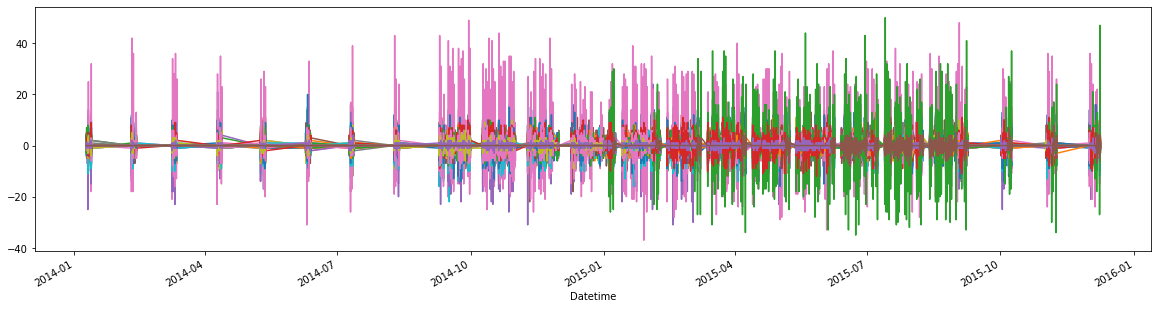

In [15]:
net_rates_by_station.plot(figsize=(20,5), legend=False)

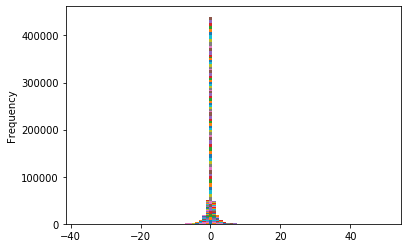

In [16]:
net_rates_by_station.plot.hist(stacked=True, bins=88, legend=False)

### 1.4 Target Matrix Observations

As can be seen from the plots, there is definitely a form periodic correlation between the net rate and the datetime.

In addition, the case of net rate = 0, and its neighboring values, present a major class imbalance in the data. This will need to be addressed, or the model will overfit on this 'class', and always predict zero, performing well on the training set and terribly on the testing set.

In the next step, the pre-processed data sources are combined using the station ID index to form one large dataset, where the net rate, geolocation and weather are recorded for each station, hour each hour interval of each date, on a separate row. The timestamps were separated into their components, and each component was represented as a sinusoid to allow the model to leverage the cyclic nature of time data.

(There is likely a better, vectorised approach for constructing the dataset, but since this is only built once, it will suffice for now)

### 1.5 Input Dataset Construction

In [17]:
# AUXILIARY FUNCTIONS

def check_station_id(pre_proc_station_data, station_ID):
    return station_ID in pre_proc_station_data['Id'].unique()

def get_net_rate(net_rates_by_station, datetime, station_ID):
    if check_station_id(pre_proc_station_data, station_ID):
        return [net_rates_by_station.loc[datetime][station_ID]]
    else: print('Station ID doesn\'t exist: %d' % station_ID)

def get_weather(pre_proc_weather_data, pre_proc_station_data, datetime, station_ID):
    if check_station_id(pre_proc_station_data, station_ID):
        station_city = pre_proc_station_data[pre_proc_station_data['Id'] == station_ID].iloc[0]['City']
        df = pre_proc_weather_data[(pre_proc_weather_data['Date'] == datetime.date()) & (pre_proc_weather_data['City'] == station_city)].drop(['Date'], axis=1)
        return df.values.tolist()[0]
    else: print('Station ID doesn\'t exist: %d' % station_ID)
        
def get_station(pre_proc_station_data, station_ID):
    if check_station_id(pre_proc_station_data, station_ID):
        df = pre_proc_station_data[pre_proc_station_data['Id'] == station_ID].drop(['Name','City'], axis=1)
        return df.values.tolist()[0]
    else: print('Station ID doesn\'t exist: %d' % station_ID)
        
def get_cyclic_datetime(datetime):
    days_in_month = datetime.days_in_month
    days_in_year = 366 if datetime.is_leap_year else 365
    
    year = str(datetime.year)
    month_sin = np.sin(2*np.pi*datetime.month/12)
    month_cos = np.cos(2*np.pi*datetime.month/12)
    day_sin = np.sin(2*np.pi*datetime.day/days_in_month)
    day_cos = np.cos(2*np.pi*datetime.day/days_in_month)
    day_of_week_sin = np.sin(2*np.pi*datetime.dayofweek/7)
    day_of_week_cos = np.cos(2*np.pi*datetime.dayofweek/7)
    day_of_year_sin = np.sin(2*np.pi*datetime.dayofyear/days_in_year)
    day_of_year_cos = np.cos(2*np.pi*datetime.dayofyear/days_in_year)
    hour_sin = np.sin(2*np.pi*datetime.hour/24)
    hour_cos = np.cos(2*np.pi*datetime.hour/24)
    return [
        year, 
        month_sin, 
        month_cos, 
        day_sin, 
        day_cos, 
        day_of_week_sin,
        day_of_week_cos,
        day_of_year_sin, 
        day_of_year_cos,
        hour_sin,
        hour_cos
    ]

def get_dataset_columns(pre_proc_station_data, pre_proc_weather_data):
    station_cols = list(pre_proc_station_data.drop(['Name','City'], axis=1).columns.values)
    net_rate_cols = ['Net Rate']
    time_cols = [
        'Year', 
        'Month (sine)',
        'Month (cosine)',
        'Day (sine)',
        'Day (cosine)',
        'Day of Week (sine)',
        'Day of Week (cosine)',
        'Day of Year (sine)',
        'Day of Year (cosine)',
        'Hour (sine)',
        'Hour (cosine)',
    ]
    weather_cols = list(pre_proc_weather_data.drop(['Date'], axis=1).columns.values)
    return station_cols + net_rate_cols + time_cols + weather_cols

# END OF AUXILIARY FUNCTIONS

# Dataset construction

# Generate a dataset row: for a station, for a particular hour-interval
def gen_dataset_row(pre_proc_station_data, pre_proc_weather_data, datetime, station_ID):
    station = get_station(pre_proc_station_data, station_ID)
    net_rate = get_net_rate(net_rates_by_station, datetime, station_ID)
    time = get_cyclic_datetime(datetime)
    weather = get_weather(pre_proc_weather_data, pre_proc_station_data, datetime, station_ID)
    
    return station + net_rate + time + weather

def gen_dataset(net_rates_by_station, pre_proc_station_data, pre_proc_weather_data):
    time_range = net_rates_by_station.index.tolist()
    station_IDs = pre_proc_station_data['Id'].unique()
    rows = []
    for station_ID in tqdm_notebook(station_IDs, desc='Station IDs'):
        for datetime in tqdm_notebook(time_range, desc='Hour intervals'):
            rows.append(gen_dataset_row(pre_proc_station_data, pre_proc_weather_data, datetime, station_ID))
    return pd.DataFrame(rows, columns=get_dataset_columns(pre_proc_station_data, pre_proc_weather_data))

In [18]:
#dataset = gen_dataset(net_rates_by_station, pre_proc_station_data, pre_proc_weather_data)
#dataset.to_csv('dataset.csv')

In [19]:
dataset = pd.read_csv('dataset.csv')

The generated index column, and the relational Id and City columns are dropped, as these are no longer needed, since they only served to relate other features to the trips.

For easy viewing, the Net Rate column is moved to the end of the dataframe.

In [20]:
dataset = dataset.dropna(axis=0)
dataset = dataset.drop([ 'Unnamed: 0', 'Id', 'City'], axis=1)
reordered_cols = list(dataset.columns).copy()
reordered_cols.remove('Net Rate')
reordered_cols.append('Net Rate')
dataset = dataset[reordered_cols]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527939 entries, 0 to 613547
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Lat                        527939 non-null  float64
 1   Long                       527939 non-null  float64
 2   Dock Count                 527939 non-null  int64  
 3   Year                       527939 non-null  int64  
 4   Month (sine)               527939 non-null  float64
 5   Month (cosine)             527939 non-null  float64
 6   Day (sine)                 527939 non-null  float64
 7   Day (cosine)               527939 non-null  float64
 8   Day of Week (sine)         527939 non-null  float64
 9   Day of Week (cosine)       527939 non-null  float64
 10  Day of Year (sine)         527939 non-null  float64
 11  Day of Year (cosine)       527939 non-null  float64
 12  Hour (sine)                527939 non-null  float64
 13  Hour (cosine)              52

### 1.6 Input Dataset Exploration

In [21]:
dataset.describe()

,Lat,Long,Dock Count,Year,Month (sine),Month (cosine),Day (sine),Day (cosine),Day of Week (sine),Day of Week (cosine),...,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Thunderstorm,Net Rate
count,527939.000000,527939.000000,527939.000000,527939.000000,5.279390e+05,5.279390e+05,5.279390e+05,527939.000000,527939.000000,527939.000000,...,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000
mean,37.616802,-122.233588,18.133354,2014.665638,-1.627381e-02,-9.088526e-03,-7.418390e-03,-0.006421,0.002545,-0.000266,...,6.994335,22.175090,0.036833,3.710783,254.760986,0.062473,0.017288,0.124026,0.003472,-0.000078
std,0.205953,0.216950,3.912374,0.471768,7.094254e-01,7.045354e-01,7.112498e-01,0.702872,0.708699,0.705508,...,3.245935,6.429518,0.215828,2.276654,77.898414,0.242013,0.130342,0.329611,0.058821,1.760382
min,37.329732,-122.418954,11.000000,2014.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000,-0.974928,-0.900969,...,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000
25%,37.385956,-122.402717,15.000000,2014.000000,-8.660254e-01,-8.660254e-01,-7.247928e-01,-0.758758,-0.781831,-0.900969,...,5.000000,18.000000,0.000000,2.000000,244.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.776619,-122.392738,19.000000,2015.000000,-2.449294e-16,-1.836970e-16,-2.449294e-16,-0.050649,0.000000,-0.222521,...,7.000000,22.000000,0.000000,4.000000,279.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.789625,-122.066553,19.000000,2015.000000,5.000000e-01,5.000000e-01,7.247928e-01,0.688967,0.781831,0.623490,...,9.000000,25.000000,0.000000,6.000000,302.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,37.804770,-121.877349,27.000000,2015.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.974928,1.000000,...,23.000000,62.000000,3.360000,8.000000,360.000000,1.000000,1.000000,1.000000,1.000000,50.000000


Half a million examples seems like many, but the vast majority of the net rate values fall within one standard deviation (1.76) of the mean (0), while the minimum and maximum values of the net rate are -37 and 50 respectively. This indicates a heavy class imbalance, or otherwise outliers.

As can be seen in the following correlation matrix, likely due to the class imbalance, there doesn't appear to be any linear correlation between the features and the net rate

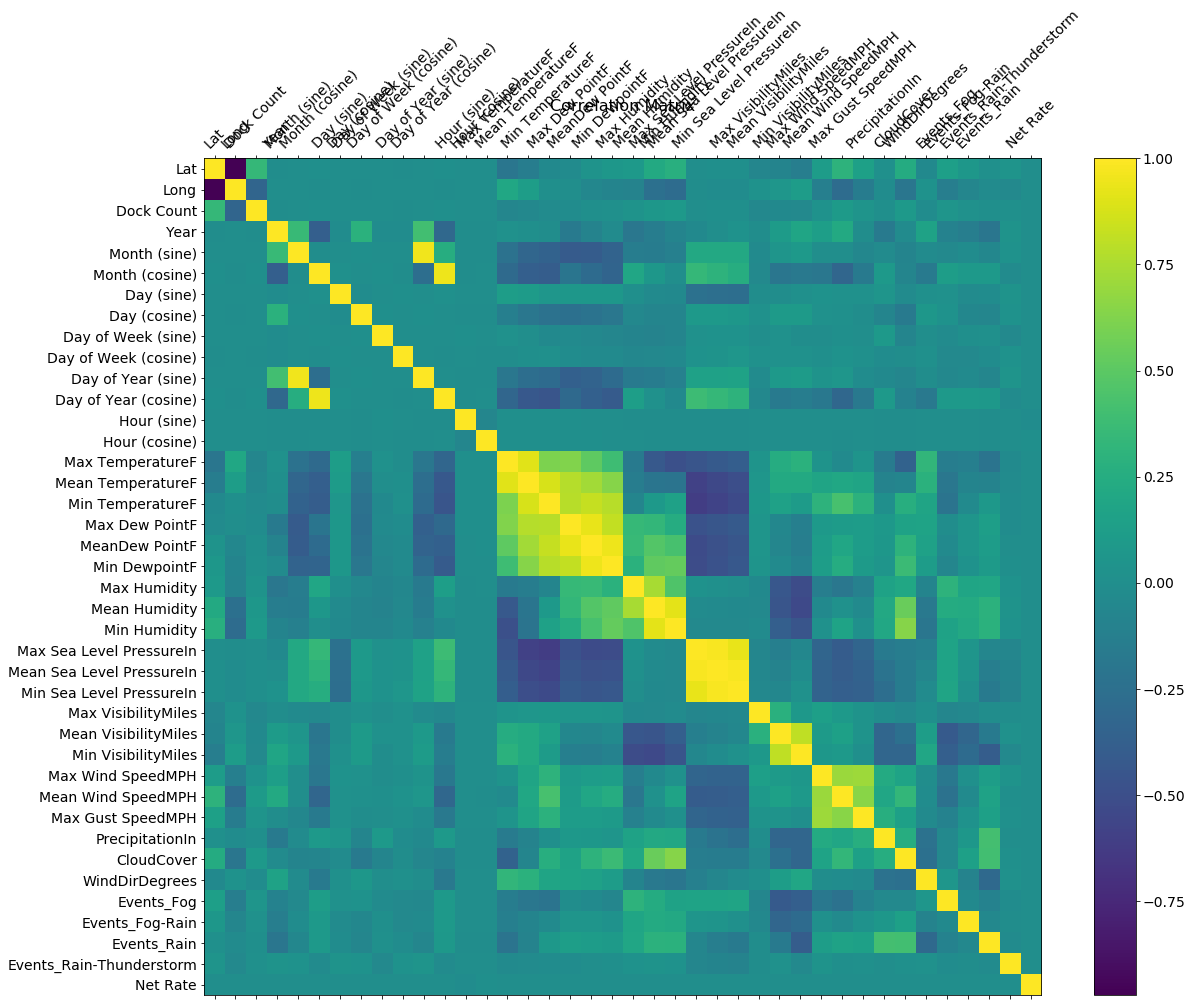

In [22]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### 1.7 Undersampling

Therefore it was attempted to reduce the class distribution to something close to a normal distribution shape. By trial and error, all occurences of net rate between -18 and 19 were reduced to 50 samples each.

In [23]:
def get_balanced_dataset(dataset, class_sample_limit, undersample_class_range):
    under_sample_dfs = []
    for i in undersample_class_range:
        under_sample_dfs.append(dataset[dataset['Net Rate'] == i].sample(class_sample_limit, replace=True))
    not_undersampled = [dataset[~dataset['Net Rate'].isin(undersample_class_range)]]
    combined = not_undersampled + (under_sample_dfs) # append arrays of dfs
    balanced_dataset = pd.concat(combined, axis=0)
    return balanced_dataset

In [24]:
balanced_dataset = get_balanced_dataset(dataset, 50, list(range(-18,19)))

This does, however, limit the dataset to two and a half thousand examples

In [25]:
print(balanced_dataset.shape)

(2455, 40)


The resulting data has a mean of 2.81 and a standard deviation of 15.44

In [26]:
balanced_dataset.describe()

,Lat,Long,Dock Count,Year,Month (sine),Month (cosine),Day (sine),Day (cosine),Day of Week (sine),Day of Week (cosine),...,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Thunderstorm,Net Rate
count,2455.000000,2455.000000,2455.000000,2455.000000,2.455000e+03,2.455000e+03,2.455000e+03,2455.000000,2455.000000,2455.000000,...,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000
mean,37.766092,-122.381324,20.215479,2014.698167,-1.153872e-02,-6.809937e-02,2.188114e-02,-0.043139,0.187809,-0.023652,...,7.790631,22.569857,0.017769,4.124644,258.776782,0.087984,0.013035,0.118126,0.003259,2.811813
std,0.081899,0.081379,3.367047,0.459147,7.284455e-01,6.819105e-01,7.193908e-01,0.693213,0.641837,0.743375,...,3.328545,6.588862,0.119961,2.167766,62.721639,0.283329,0.113446,0.322823,0.057003,15.440860
min,37.329732,-122.418954,11.000000,2014.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000,-0.974928,-0.900969,...,1.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-37.000000
25%,37.776600,-122.398108,19.000000,2014.000000,-8.660254e-01,-8.660254e-01,-7.247928e-01,-0.669131,-0.433884,-0.900969,...,5.000000,20.000000,0.000000,2.000000,251.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
50%,37.776617,-122.395260,19.000000,2015.000000,1.224647e-16,-1.836970e-16,-2.449294e-16,-0.050649,0.433884,-0.222521,...,8.000000,23.000000,0.000000,4.000000,272.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,37.789756,-122.394643,23.000000,2015.000000,8.660254e-01,5.000000e-01,7.818315e-01,0.669131,0.781831,0.623490,...,10.000000,25.000000,0.000000,6.000000,294.500000,0.000000,0.000000,0.000000,0.000000,15.000000
max,37.804770,-121.877349,27.000000,2015.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.974928,1.000000,...,22.000000,62.000000,3.230000,8.000000,357.000000,1.000000,1.000000,1.000000,1.000000,50.000000


The data now has a much more balanced profile

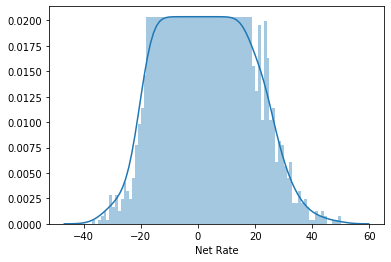

In [27]:
n_bins = int(balanced_dataset['Net Rate'].max()) - int(balanced_dataset['Net Rate'].min())
sns.distplot(balanced_dataset['Net Rate'], bins=n_bins)

Replotting the correlation matrix for the balanced dataset reveals a strong linear correlation to the sinusoids of the Hour feature - as initially hypothesised by the periodic nature of the net rate data. There may be further non-linear features of importance

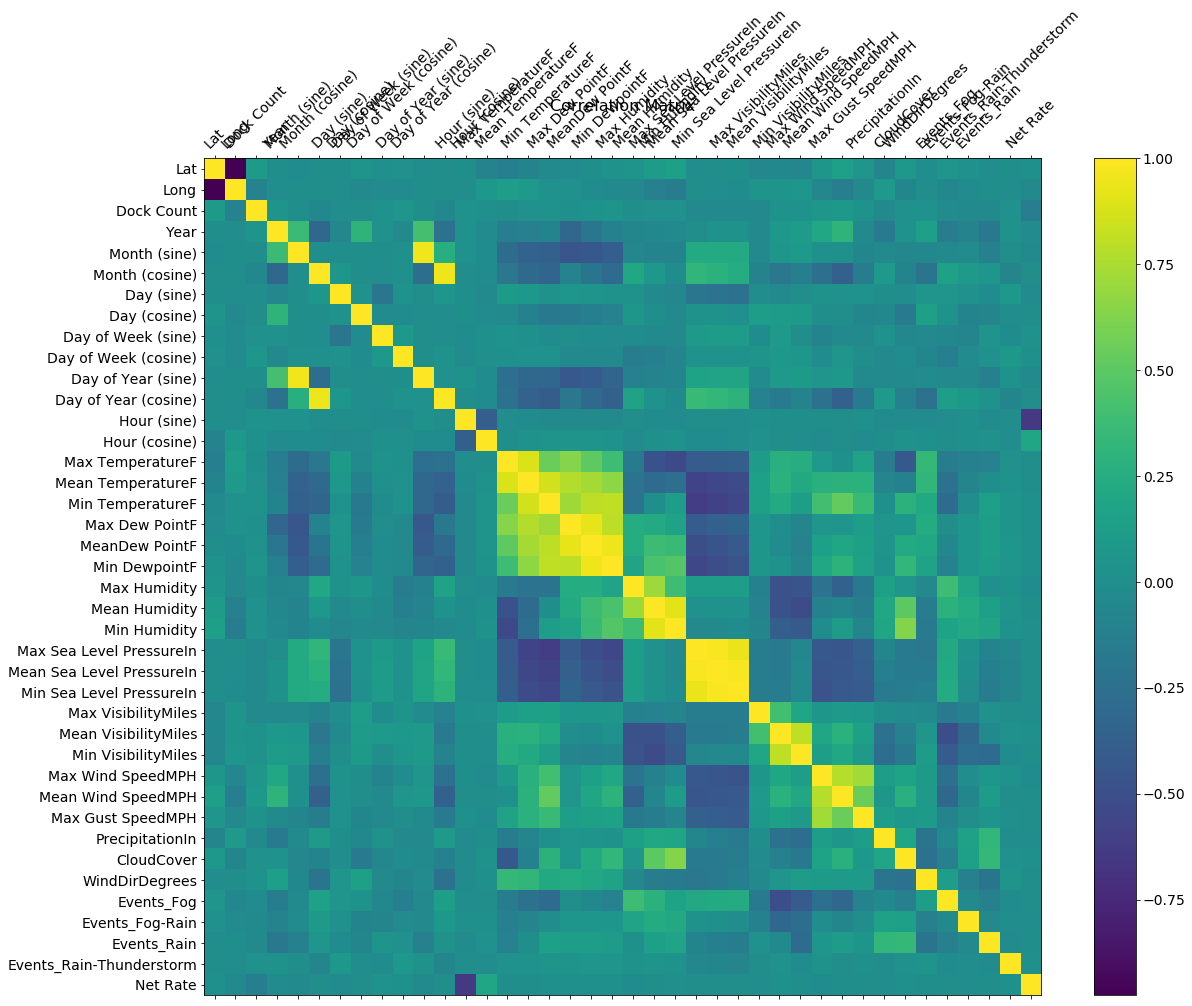

In [28]:
f = plt.figure(figsize=(19, 15))
plt.matshow(balanced_dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## 2. Modelling Approach

My approach was to begin with a Random Forest model to select features and build a potential model, and finally compare it to a baseline (a simple constant average prediction).

Finally, I would also create a Neural Network, and test it for different configurations to see if it outperformed the Random Forest.

### 2.1 Feature selection by Random Forest

The inital goal was to identify features that contribute linearly or non-linearly to the target. After some research, I elected to use a Random Forest Regressor model to attempt to identify important features, and as a side benefit, possibly train a viable model. The R-squared (R^2) metric was used to determine how well the selected features were linearly modelling the target in the model.

The datasets were split by a standard 3:1 ratio (train:test) and the input data was scaled using a Standard Scaler.

In [29]:
cols = list(balanced_dataset.columns)
feature_cols = cols.copy()
feature_cols.remove('Net Rate')
target_col = 'Net Rate'

In [30]:
def get_X_y_sets(dataset):
    X = dataset.drop(['Net Rate'], axis=1)
    y = dataset['Net Rate']
    # Default train:test ratio of 3:1
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    # Normalise
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

def get_RFR_model(N, num_CPUs=4):
    rf = RandomForestRegressor(
        n_estimators = N,
        bootstrap = True,
        oob_score = True,
        random_state = 42, # The answer to the Universe, Life, and Everything
        n_jobs = num_CPUs
    )
    return rf

def get_RFR_scores(rf, X_train_scaled, X_test_scaled, y_train, y_test):
    R2_val = rf.score(X_train_scaled, y_train)
    OOB = rf.oob_score_
    R2_test = rf.score(X_test_scaled, y_test)
    return R2_val, OOB, R2_test

In [31]:
X_train_scaled, X_test_scaled, y_train, y_test, scaler = get_X_y_sets(balanced_dataset)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(1841, 39)
(614, 39)


#### 2.1.1 Random Forest hyperparameter sweep

The optimal number of estimators for the Random Forest Regressor had to be determined, and was determined by an incremental loop

In [32]:
results = []

est_list = list(range(10,210,10))

for n in est_list:
    rf = get_RFR_model(n)
    rf.fit(X_train_scaled, y_train)
    R2_val, OOB, R2_test = get_RFR_scores(rf, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append([R2_val, OOB, R2_test])

/home/tristan/.local/share/virtualenvs/codility-ml-test-tR3UURAZ/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/tristan/.local/share/virtualenvs/codility-ml-test-tR3UURAZ/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


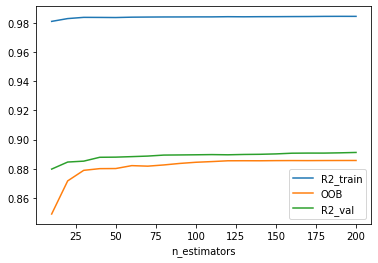

In [33]:
results_df = pd.DataFrame(results, columns=['R2_train', 'OOB', 'R2_val'], index=est_list)
results_df.index.name = 'n_estimators'
results_df.plot()

#### 2.1.2 Random Forest feature weights

The model scores appear to even out at about 125 estimators for the Random Forest Regressors.

The feature importances could now be extracted and visualised:

In [34]:
rf = get_RFR_model(125)
rf.fit(X_train_scaled, y_train)
df = pd.DataFrame([list(get_RFR_scores(rf, X_train_scaled, X_test_scaled, y_train, y_test))], columns=['R^2 train', 'OOB', 'R^2 test'], index=['Random Forest'])
display(df)

,R^2 train,OOB,R^2 test
Random Forest,0.984277,0.885465,0.889812


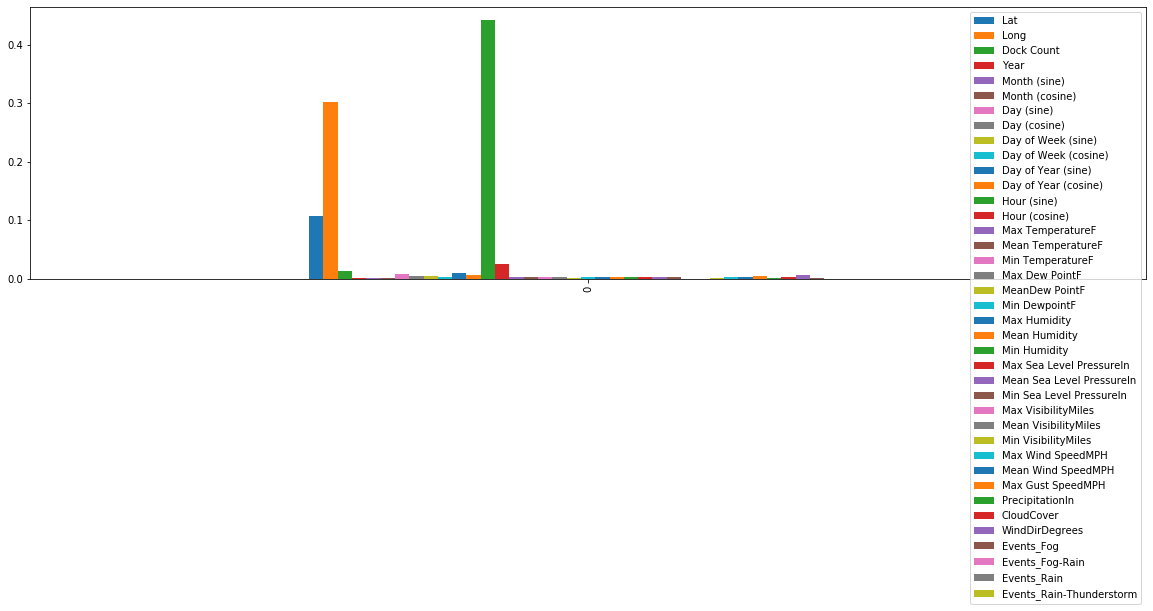

In [35]:
f_imps = pd.DataFrame([rf.feature_importances_], columns=feature_cols)
f_imps.plot.bar(figsize=(20,5))

The Random Forest Regressor appears to suggest that the Hour (sine), Longitude, Latitude, Hour (cosine) and Dock Count , in that order, are the most important features for the prediction. 

The time aspect certainly makes sense - the time of day is the most likely to have an influence on whether there will be a high rental rate of bikes.

The geolocation aspect may reflect a higher popularity of the bike rental service in certain cities, or simply a skewed distribution of stations between cities.

I find it surprising that the weather features do not seem to contribute heavily to the prediction - this may be due to the model, or perhaps the weather is not varied enough over the Bay Area to elicit a strong relation to the target.

The Random Forest Regressor can now be retrained with the most important features:

### 2.2 Random Forest Regressor fitting

In [36]:
feature_cols_r = ['Hour (sine)', 'Long', 'Lat', 'Hour (cosine)', 'Dock Count']

In [37]:
def get_X_y_sets_reduced(dataset):
    X = dataset[feature_cols_r]
    y = dataset['Net Rate']
    # Default train:test ratio of 3:1
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    # Normalise
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

In [38]:
X_train_scaled_r, X_test_scaled_r, y_train, y_test, scaler_r = get_X_y_sets_reduced(balanced_dataset)

In [39]:
rf = get_RFR_model(125)
rf.fit(X_train_scaled_r, y_train)
df = pd.DataFrame([list(get_RFR_scores(rf, X_train_scaled_r, X_test_scaled_r, y_train, y_test))], columns=['R^2 train', 'OOB', 'R^2 test'], index=['Random Forest'])
display(df)

,R^2 train,OOB,R^2 test
Random Forest,0.902155,0.882179,0.890925


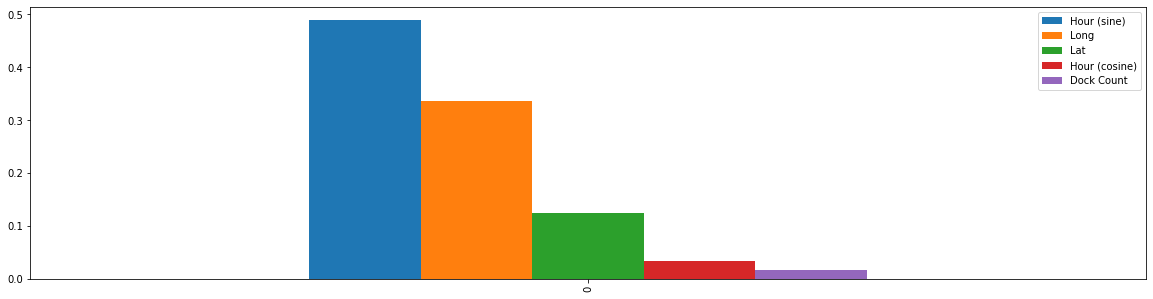

In [40]:
f_imps = pd.DataFrame([rf.feature_importances_], columns=feature_cols_r)
f_imps.plot.bar(figsize=(20,5))

The OOB and testing scores appear to hold with the 5 selected features

### 2.3 Neural Network fitting

#### 2.3.1 Baseline Neural Network

In [41]:
def baseline_nn():
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[mae, mse])
    return model

baseline_nn_model = baseline_nn()
baseline_nn_history = baseline_nn_model.fit(X_train_scaled_r, y_train, epochs=50, batch_size=10)

Epoch 1/50
1841/1841 [==============================] - 0s 100us/step - loss: 243.4815 - mean_absolute_error: 13.0798 - mean_squared_error: 243.4815
Epoch 2/50
1841/1841 [==============================] - 0s 63us/step - loss: 237.6752 - mean_absolute_error: 12.9389 - mean_squared_error: 237.6752
Epoch 3/50
1841/1841 [==============================] - 0s 77us/step - loss: 227.0068 - mean_absolute_error: 12.6714 - mean_squared_error: 227.0069
Epoch 4/50
1841/1841 [==============================] - 0s 66us/step - loss: 212.9486 - mean_absolute_error: 12.3101 - mean_squared_error: 212.9486
Epoch 5/50
1841/1841 [==============================] - 0s 64us/step - loss: 197.6805 - mean_absolute_error: 11.8970 - mean_squared_error: 197.6805
Epoch 6/50
1841/1841 [==============================] - 0s 68us/step - loss: 183.1542 - mean_absolute_error: 11.4788 - mean_squared_error: 183.1541
Epoch 7/50
1841/1841 [==============================] - 0s 66us/step - loss: 170.1301 - mean_absolute_error: 11

I limited the baseline model to 50 epochs, as it did not seem to be improving above an RMSE of 10.

#### 2.3.2 Deeper

In [42]:
def deeper_nn():
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal'))
    model.add(Dense(5, kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[mae, mse])
    return model

deeper_nn_model = deeper_nn()
deeper_nn_history = deeper_nn_model.fit(X_train_scaled_r, y_train, epochs=50, batch_size=10)

Epoch 1/50
1841/1841 [==============================] - 0s 117us/step - loss: 240.3777 - mean_absolute_error: 13.0093 - mean_squared_error: 240.3777
Epoch 2/50
1841/1841 [==============================] - 0s 69us/step - loss: 171.1878 - mean_absolute_error: 11.0317 - mean_squared_error: 171.1878
Epoch 3/50
1841/1841 [==============================] - 0s 85us/step - loss: 127.3836 - mean_absolute_error: 9.1723 - mean_squared_error: 127.3836
Epoch 4/50
1841/1841 [==============================] - 0s 78us/step - loss: 116.7944 - mean_absolute_error: 8.4855 - mean_squared_error: 116.7944
Epoch 5/50
1841/1841 [==============================] - 0s 75us/step - loss: 112.0204 - mean_absolute_error: 8.2755 - mean_squared_error: 112.0204
Epoch 6/50
1841/1841 [==============================] - 0s 77us/step - loss: 108.8098 - mean_absolute_error: 8.1310 - mean_squared_error: 108.8098
Epoch 7/50
1841/1841 [==============================] - 0s 70us/step - loss: 106.4336 - mean_absolute_error: 8.0559

Again, I limited the epochs as the RMSE stalled at roughly 9.

#### 2.3.3 Wider

In [43]:
def wider_nn():
    model = Sequential()
    model.add(Dense(20, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[mae, mse])
    return model

wider_nn_model = wider_nn()
wider_nn_history = wider_nn_model.fit(X_train_scaled_r, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
1841/1841 [==============================] - 0s 96us/step - loss: 236.9073 - mean_absolute_error: 12.8982 - mean_squared_error: 236.9073
Epoch 2/1000
1841/1841 [==============================] - 0s 65us/step - loss: 199.4843 - mean_absolute_error: 11.8829 - mean_squared_error: 199.4843
Epoch 3/1000
1841/1841 [==============================] - 0s 80us/step - loss: 159.0537 - mean_absolute_error: 10.6306 - mean_squared_error: 159.0536
Epoch 4/1000
1841/1841 [==============================] - 0s 66us/step - loss: 135.6025 - mean_absolute_error: 9.6213 - mean_squared_error: 135.6025
Epoch 5/1000
1841/1841 [==============================] - 0s 62us/step - loss: 124.6761 - mean_absolute_error: 9.0445 - mean_squared_error: 124.6761
Epoch 6/1000
1841/1841 [==============================] - 0s 66us/step - loss: 119.0913 - mean_absolute_error: 8.7311 - mean_squared_error: 119.0914
Epoch 7/1000
1841/1841 [==============================] - 0s 65us/step - loss: 115.7789 - mean_absolute

1841/1841 [==============================] - 0s 67us/step - loss: 93.2973 - mean_absolute_error: 7.4073 - mean_squared_error: 93.2973
Epoch 57/1000
1841/1841 [==============================] - 0s 62us/step - loss: 93.2504 - mean_absolute_error: 7.3983 - mean_squared_error: 93.2504
Epoch 58/1000
1841/1841 [==============================] - 0s 62us/step - loss: 93.1653 - mean_absolute_error: 7.3936 - mean_squared_error: 93.1653
Epoch 59/1000
1841/1841 [==============================] - 0s 63us/step - loss: 92.9208 - mean_absolute_error: 7.3899 - mean_squared_error: 92.9208
Epoch 60/1000
1841/1841 [==============================] - 0s 60us/step - loss: 92.8218 - mean_absolute_error: 7.3636 - mean_squared_error: 92.8219
Epoch 61/1000
1841/1841 [==============================] - 0s 62us/step - loss: 92.6817 - mean_absolute_error: 7.3758 - mean_squared_error: 92.6817
Epoch 62/1000
1841/1841 [==============================] - 0s 62us/step - loss: 92.5361 - mean_absolute_error: 7.3721 - mean_s

1841/1841 [==============================] - 0s 64us/step - loss: 88.8174 - mean_absolute_error: 7.1574 - mean_squared_error: 88.8174
Epoch 112/1000
1841/1841 [==============================] - 0s 58us/step - loss: 88.6889 - mean_absolute_error: 7.1505 - mean_squared_error: 88.6888
Epoch 113/1000
1841/1841 [==============================] - 0s 61us/step - loss: 88.7521 - mean_absolute_error: 7.1439 - mean_squared_error: 88.7521
Epoch 114/1000
1841/1841 [==============================] - 0s 63us/step - loss: 88.5770 - mean_absolute_error: 7.1319 - mean_squared_error: 88.5770
Epoch 115/1000
1841/1841 [==============================] - 0s 72us/step - loss: 88.5597 - mean_absolute_error: 7.1447 - mean_squared_error: 88.5596
Epoch 116/1000
1841/1841 [==============================] - 0s 63us/step - loss: 88.4354 - mean_absolute_error: 7.1345 - mean_squared_error: 88.4354
Epoch 117/1000
1841/1841 [==============================] - 0s 77us/step - loss: 88.4414 - mean_absolute_error: 7.1339 - 

1841/1841 [==============================] - 0s 72us/step - loss: 86.1101 - mean_absolute_error: 7.0099 - mean_squared_error: 86.1102
Epoch 167/1000
1841/1841 [==============================] - 0s 62us/step - loss: 85.8639 - mean_absolute_error: 6.9948 - mean_squared_error: 85.8639
Epoch 168/1000
1841/1841 [==============================] - 0s 63us/step - loss: 86.0258 - mean_absolute_error: 7.0269 - mean_squared_error: 86.0258
Epoch 169/1000
1841/1841 [==============================] - 0s 68us/step - loss: 85.8459 - mean_absolute_error: 7.0181 - mean_squared_error: 85.8459
Epoch 170/1000
1841/1841 [==============================] - 0s 64us/step - loss: 85.9722 - mean_absolute_error: 7.0041 - mean_squared_error: 85.9722
Epoch 171/1000
1841/1841 [==============================] - 0s 62us/step - loss: 85.7659 - mean_absolute_error: 7.0000 - mean_squared_error: 85.7659
Epoch 172/1000
1841/1841 [==============================] - 0s 66us/step - loss: 85.6925 - mean_absolute_error: 6.9967 - 

1841/1841 [==============================] - 0s 76us/step - loss: 82.8370 - mean_absolute_error: 6.8352 - mean_squared_error: 82.8370
Epoch 222/1000
1841/1841 [==============================] - 0s 71us/step - loss: 82.7126 - mean_absolute_error: 6.8187 - mean_squared_error: 82.7126
Epoch 223/1000
1841/1841 [==============================] - 0s 62us/step - loss: 82.5913 - mean_absolute_error: 6.8220 - mean_squared_error: 82.5913
Epoch 224/1000
1841/1841 [==============================] - 0s 60us/step - loss: 82.4250 - mean_absolute_error: 6.7930 - mean_squared_error: 82.4251
Epoch 225/1000
1841/1841 [==============================] - 0s 61us/step - loss: 82.3157 - mean_absolute_error: 6.8026 - mean_squared_error: 82.3157
Epoch 226/1000
1841/1841 [==============================] - 0s 59us/step - loss: 82.3457 - mean_absolute_error: 6.8301 - mean_squared_error: 82.3457
Epoch 227/1000
1841/1841 [==============================] - 0s 61us/step - loss: 82.2003 - mean_absolute_error: 6.7915 - 

1841/1841 [==============================] - 0s 67us/step - loss: 70.4511 - mean_absolute_error: 6.2274 - mean_squared_error: 70.4511
Epoch 277/1000
1841/1841 [==============================] - 0s 67us/step - loss: 70.1476 - mean_absolute_error: 6.2216 - mean_squared_error: 70.1476
Epoch 278/1000
1841/1841 [==============================] - 0s 62us/step - loss: 69.9792 - mean_absolute_error: 6.2135 - mean_squared_error: 69.9792
Epoch 279/1000
1841/1841 [==============================] - 0s 62us/step - loss: 69.9353 - mean_absolute_error: 6.2226 - mean_squared_error: 69.9353
Epoch 280/1000
1841/1841 [==============================] - 0s 63us/step - loss: 69.8134 - mean_absolute_error: 6.1930 - mean_squared_error: 69.8134
Epoch 281/1000
1841/1841 [==============================] - 0s 80us/step - loss: 69.2823 - mean_absolute_error: 6.1744 - mean_squared_error: 69.2823
Epoch 282/1000
1841/1841 [==============================] - 0s 78us/step - loss: 69.3950 - mean_absolute_error: 6.1794 - 

1841/1841 [==============================] - 0s 63us/step - loss: 62.3462 - mean_absolute_error: 5.8395 - mean_squared_error: 62.3463
Epoch 332/1000
1841/1841 [==============================] - 0s 64us/step - loss: 62.2357 - mean_absolute_error: 5.8256 - mean_squared_error: 62.2357
Epoch 333/1000
1841/1841 [==============================] - 0s 67us/step - loss: 61.9837 - mean_absolute_error: 5.8212 - mean_squared_error: 61.9837
Epoch 334/1000
1841/1841 [==============================] - 0s 64us/step - loss: 61.9014 - mean_absolute_error: 5.8102 - mean_squared_error: 61.9014
Epoch 335/1000
1841/1841 [==============================] - 0s 62us/step - loss: 61.8536 - mean_absolute_error: 5.8064 - mean_squared_error: 61.8536
Epoch 336/1000
1841/1841 [==============================] - 0s 64us/step - loss: 61.6637 - mean_absolute_error: 5.8055 - mean_squared_error: 61.6637
Epoch 337/1000
1841/1841 [==============================] - 0s 64us/step - loss: 61.5380 - mean_absolute_error: 5.7949 - 

1841/1841 [==============================] - 0s 65us/step - loss: 56.4024 - mean_absolute_error: 5.5370 - mean_squared_error: 56.4024
Epoch 387/1000
1841/1841 [==============================] - 0s 66us/step - loss: 56.3222 - mean_absolute_error: 5.5262 - mean_squared_error: 56.3222
Epoch 388/1000
1841/1841 [==============================] - 0s 71us/step - loss: 56.1568 - mean_absolute_error: 5.5182 - mean_squared_error: 56.1568
Epoch 389/1000
1841/1841 [==============================] - 0s 65us/step - loss: 56.0255 - mean_absolute_error: 5.5099 - mean_squared_error: 56.0255
Epoch 390/1000
1841/1841 [==============================] - 0s 72us/step - loss: 56.1310 - mean_absolute_error: 5.5367 - mean_squared_error: 56.1310
Epoch 391/1000
1841/1841 [==============================] - 0s 67us/step - loss: 56.0638 - mean_absolute_error: 5.5237 - mean_squared_error: 56.0637
Epoch 392/1000
1841/1841 [==============================] - 0s 62us/step - loss: 56.0025 - mean_absolute_error: 5.5110 - 

1841/1841 [==============================] - 0s 63us/step - loss: 52.4975 - mean_absolute_error: 5.3666 - mean_squared_error: 52.4975
Epoch 442/1000
1841/1841 [==============================] - 0s 74us/step - loss: 52.3670 - mean_absolute_error: 5.3555 - mean_squared_error: 52.3670
Epoch 443/1000
1841/1841 [==============================] - 0s 82us/step - loss: 52.3315 - mean_absolute_error: 5.3534 - mean_squared_error: 52.3315
Epoch 444/1000
1841/1841 [==============================] - 0s 62us/step - loss: 52.3077 - mean_absolute_error: 5.3610 - mean_squared_error: 52.3077
Epoch 445/1000
1841/1841 [==============================] - 0s 63us/step - loss: 52.2604 - mean_absolute_error: 5.3502 - mean_squared_error: 52.2605
Epoch 446/1000
1841/1841 [==============================] - 0s 60us/step - loss: 52.3485 - mean_absolute_error: 5.3582 - mean_squared_error: 52.3485
Epoch 447/1000
1841/1841 [==============================] - 0s 65us/step - loss: 52.1513 - mean_absolute_error: 5.3455 - 

1841/1841 [==============================] - 0s 65us/step - loss: 50.0298 - mean_absolute_error: 5.2740 - mean_squared_error: 50.0297
Epoch 497/1000
1841/1841 [==============================] - 0s 63us/step - loss: 49.9975 - mean_absolute_error: 5.2634 - mean_squared_error: 49.9975
Epoch 498/1000
1841/1841 [==============================] - 0s 62us/step - loss: 50.0206 - mean_absolute_error: 5.2669 - mean_squared_error: 50.0206
Epoch 499/1000
1841/1841 [==============================] - 0s 60us/step - loss: 49.8948 - mean_absolute_error: 5.2555 - mean_squared_error: 49.8948
Epoch 500/1000
1841/1841 [==============================] - 0s 60us/step - loss: 49.9396 - mean_absolute_error: 5.2633 - mean_squared_error: 49.9396
Epoch 501/1000
1841/1841 [==============================] - 0s 61us/step - loss: 49.8996 - mean_absolute_error: 5.2591 - mean_squared_error: 49.8996
Epoch 502/1000
1841/1841 [==============================] - 0s 59us/step - loss: 49.8112 - mean_absolute_error: 5.2540 - 

1841/1841 [==============================] - 0s 61us/step - loss: 48.4252 - mean_absolute_error: 5.1924 - mean_squared_error: 48.4251
Epoch 552/1000
1841/1841 [==============================] - 0s 62us/step - loss: 48.4295 - mean_absolute_error: 5.1923 - mean_squared_error: 48.4295
Epoch 553/1000
1841/1841 [==============================] - 0s 63us/step - loss: 48.3316 - mean_absolute_error: 5.1907 - mean_squared_error: 48.3316
Epoch 554/1000
1841/1841 [==============================] - 0s 61us/step - loss: 48.4039 - mean_absolute_error: 5.1888 - mean_squared_error: 48.4039
Epoch 555/1000
1841/1841 [==============================] - 0s 61us/step - loss: 48.3584 - mean_absolute_error: 5.1860 - mean_squared_error: 48.3584
Epoch 556/1000
1841/1841 [==============================] - 0s 59us/step - loss: 48.2788 - mean_absolute_error: 5.1904 - mean_squared_error: 48.2788
Epoch 557/1000
1841/1841 [==============================] - 0s 62us/step - loss: 48.3542 - mean_absolute_error: 5.1869 - 

1841/1841 [==============================] - 0s 63us/step - loss: 47.3014 - mean_absolute_error: 5.1372 - mean_squared_error: 47.3014
Epoch 607/1000
1841/1841 [==============================] - 0s 61us/step - loss: 47.3855 - mean_absolute_error: 5.1423 - mean_squared_error: 47.3855
Epoch 608/1000
1841/1841 [==============================] - 0s 63us/step - loss: 47.3546 - mean_absolute_error: 5.1356 - mean_squared_error: 47.3546
Epoch 609/1000
1841/1841 [==============================] - 0s 61us/step - loss: 47.2355 - mean_absolute_error: 5.1261 - mean_squared_error: 47.2355
Epoch 610/1000
1841/1841 [==============================] - 0s 59us/step - loss: 47.4439 - mean_absolute_error: 5.1427 - mean_squared_error: 47.4439
Epoch 611/1000
1841/1841 [==============================] - 0s 61us/step - loss: 47.2713 - mean_absolute_error: 5.1401 - mean_squared_error: 47.2713
Epoch 612/1000
1841/1841 [==============================] - 0s 68us/step - loss: 47.3045 - mean_absolute_error: 5.1405 - 

1841/1841 [==============================] - 0s 66us/step - loss: 46.5785 - mean_absolute_error: 5.1045 - mean_squared_error: 46.5785
Epoch 662/1000
1841/1841 [==============================] - 0s 61us/step - loss: 46.5356 - mean_absolute_error: 5.0939 - mean_squared_error: 46.5356
Epoch 663/1000
1841/1841 [==============================] - 0s 59us/step - loss: 46.3996 - mean_absolute_error: 5.0959 - mean_squared_error: 46.3995
Epoch 664/1000
1841/1841 [==============================] - 0s 61us/step - loss: 46.5285 - mean_absolute_error: 5.1135 - mean_squared_error: 46.5285
Epoch 665/1000
1841/1841 [==============================] - 0s 64us/step - loss: 46.4515 - mean_absolute_error: 5.1007 - mean_squared_error: 46.4515
Epoch 666/1000
1841/1841 [==============================] - 0s 63us/step - loss: 46.3327 - mean_absolute_error: 5.0870 - mean_squared_error: 46.3327
Epoch 667/1000
1841/1841 [==============================] - 0s 63us/step - loss: 46.5433 - mean_absolute_error: 5.1101 - 

1841/1841 [==============================] - 0s 63us/step - loss: 45.8916 - mean_absolute_error: 5.0807 - mean_squared_error: 45.8916
Epoch 717/1000
1841/1841 [==============================] - 0s 61us/step - loss: 46.0623 - mean_absolute_error: 5.0872 - mean_squared_error: 46.0623
Epoch 718/1000
1841/1841 [==============================] - 0s 60us/step - loss: 45.8027 - mean_absolute_error: 5.0828 - mean_squared_error: 45.8027
Epoch 719/1000
1841/1841 [==============================] - 0s 61us/step - loss: 45.7366 - mean_absolute_error: 5.0707 - mean_squared_error: 45.7367
Epoch 720/1000
1841/1841 [==============================] - 0s 61us/step - loss: 45.7808 - mean_absolute_error: 5.0749 - mean_squared_error: 45.7808
Epoch 721/1000
1841/1841 [==============================] - 0s 62us/step - loss: 45.7682 - mean_absolute_error: 5.0817 - mean_squared_error: 45.7682
Epoch 722/1000
1841/1841 [==============================] - 0s 60us/step - loss: 45.7333 - mean_absolute_error: 5.0730 - 

1841/1841 [==============================] - 0s 72us/step - loss: 45.0947 - mean_absolute_error: 5.0439 - mean_squared_error: 45.0947
Epoch 772/1000
1841/1841 [==============================] - 0s 64us/step - loss: 45.1059 - mean_absolute_error: 5.0603 - mean_squared_error: 45.1059
Epoch 773/1000
1841/1841 [==============================] - 0s 64us/step - loss: 45.0100 - mean_absolute_error: 5.0513 - mean_squared_error: 45.0100
Epoch 774/1000
1841/1841 [==============================] - 0s 64us/step - loss: 44.9758 - mean_absolute_error: 5.0414 - mean_squared_error: 44.9758
Epoch 775/1000
1841/1841 [==============================] - 0s 65us/step - loss: 44.9749 - mean_absolute_error: 5.0361 - mean_squared_error: 44.9749
Epoch 776/1000
1841/1841 [==============================] - 0s 81us/step - loss: 44.9972 - mean_absolute_error: 5.0355 - mean_squared_error: 44.9972
Epoch 777/1000
1841/1841 [==============================] - 0s 89us/step - loss: 44.9525 - mean_absolute_error: 5.0286 - 

1841/1841 [==============================] - 0s 69us/step - loss: 44.2432 - mean_absolute_error: 5.0108 - mean_squared_error: 44.2432
Epoch 827/1000
1841/1841 [==============================] - 0s 67us/step - loss: 44.2953 - mean_absolute_error: 5.0082 - mean_squared_error: 44.2953
Epoch 828/1000
1841/1841 [==============================] - 0s 62us/step - loss: 44.3678 - mean_absolute_error: 5.0109 - mean_squared_error: 44.3678
Epoch 829/1000
1841/1841 [==============================] - 0s 61us/step - loss: 44.2255 - mean_absolute_error: 5.0069 - mean_squared_error: 44.2255
Epoch 830/1000
1841/1841 [==============================] - 0s 62us/step - loss: 44.2612 - mean_absolute_error: 4.9967 - mean_squared_error: 44.2612
Epoch 831/1000
1841/1841 [==============================] - 0s 63us/step - loss: 44.1647 - mean_absolute_error: 4.9995 - mean_squared_error: 44.1647
Epoch 832/1000
1841/1841 [==============================] - 0s 60us/step - loss: 44.3578 - mean_absolute_error: 4.9982 - 

1841/1841 [==============================] - 0s 70us/step - loss: 43.5709 - mean_absolute_error: 4.9554 - mean_squared_error: 43.5708
Epoch 882/1000
1841/1841 [==============================] - 0s 62us/step - loss: 43.6003 - mean_absolute_error: 4.9521 - mean_squared_error: 43.6003
Epoch 883/1000
1841/1841 [==============================] - 0s 64us/step - loss: 43.5016 - mean_absolute_error: 4.9611 - mean_squared_error: 43.5016
Epoch 884/1000
1841/1841 [==============================] - 0s 61us/step - loss: 43.4169 - mean_absolute_error: 4.9442 - mean_squared_error: 43.4169
Epoch 885/1000
1841/1841 [==============================] - 0s 61us/step - loss: 43.5514 - mean_absolute_error: 4.9719 - mean_squared_error: 43.5514
Epoch 886/1000
1841/1841 [==============================] - 0s 60us/step - loss: 43.4373 - mean_absolute_error: 4.9643 - mean_squared_error: 43.4373
Epoch 887/1000
1841/1841 [==============================] - 0s 62us/step - loss: 43.4384 - mean_absolute_error: 4.9574 - 

1841/1841 [==============================] - 0s 63us/step - loss: 42.1268 - mean_absolute_error: 4.8958 - mean_squared_error: 42.1268
Epoch 937/1000
1841/1841 [==============================] - 0s 63us/step - loss: 42.2454 - mean_absolute_error: 4.9050 - mean_squared_error: 42.2454
Epoch 938/1000
1841/1841 [==============================] - 0s 63us/step - loss: 42.1383 - mean_absolute_error: 4.8975 - mean_squared_error: 42.1383
Epoch 939/1000
1841/1841 [==============================] - 0s 65us/step - loss: 42.1387 - mean_absolute_error: 4.9132 - mean_squared_error: 42.1387
Epoch 940/1000
1841/1841 [==============================] - 0s 61us/step - loss: 42.1310 - mean_absolute_error: 4.9040 - mean_squared_error: 42.1310
Epoch 941/1000
1841/1841 [==============================] - 0s 62us/step - loss: 42.1349 - mean_absolute_error: 4.9024 - mean_squared_error: 42.1349
Epoch 942/1000
1841/1841 [==============================] - 0s 63us/step - loss: 42.1653 - mean_absolute_error: 4.9082 - 

1841/1841 [==============================] - 0s 71us/step - loss: 41.4841 - mean_absolute_error: 4.8808 - mean_squared_error: 41.4841
Epoch 992/1000
1841/1841 [==============================] - 0s 61us/step - loss: 41.3599 - mean_absolute_error: 4.8646 - mean_squared_error: 41.3599
Epoch 993/1000
1841/1841 [==============================] - 0s 60us/step - loss: 41.3758 - mean_absolute_error: 4.8712 - mean_squared_error: 41.3758
Epoch 994/1000
1841/1841 [==============================] - 0s 64us/step - loss: 41.4353 - mean_absolute_error: 4.8852 - mean_squared_error: 41.4353
Epoch 995/1000
1841/1841 [==============================] - 0s 61us/step - loss: 41.4928 - mean_absolute_error: 4.8733 - mean_squared_error: 41.4928
Epoch 996/1000
1841/1841 [==============================] - 0s 64us/step - loss: 41.4335 - mean_absolute_error: 4.8796 - mean_squared_error: 41.4335
Epoch 997/1000
1841/1841 [==============================] - 0s 60us/step - loss: 41.2841 - mean_absolute_error: 4.8620 - 

The wider neural network performed better than the others, and its results are compared to the Random Forest in the next section

## 3. Model Performance

For a broad view of model performance, the Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) metrics were used.

The MAE would give an average of by how much the prediction was missing the mark, but MAE may not adequately reflect the performance with regards to large error values, and may be a misrepresentation due to positive and negative values of Net Rate.

The MSE would penalize large errors, and is used to calculate the RMSE. The closer MSE is to 0, the better the model is performing overall, and it can be used to compare two models.

The RMSE gives the square root of the MSE, which is easier to compare to the actual Net Rate value scale directly. 

These errors would need to be taken in the context of the distribution and range of the Net Rate values. Also, the dataset distrubution was modified to train the model, and it would need to be confirmed that the model accuracy holds for the original distribution of values.

In [44]:
def get_accuracy_scores(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

def get_RFR_accuracy(rf, X, y):
    y_pred = rf.predict(X)
    return get_accuracy_scores(y, y_pred)

### 3.1 Baseline model accuracy

For reference, we establish a simple baseline model: assuming that all predictions equal the mean of the Net Rate.

Using the balanced dataset:

In [45]:
avg_net_rate = np.mean(balanced_dataset['Net Rate'])
print('avg: %f' % avg_net_rate)

y_pred_train_baseline = [avg_net_rate] * len(y_train)
y_pred_test_baseline = [avg_net_rate] * len(y_test)

df = pd.DataFrame(
    [
        list(get_accuracy_scores(y_train, y_pred_train_baseline)),
        list(get_accuracy_scores(y_test, y_pred_test_baseline))
    ], 
    columns=['MAE','MSE','RMSE'], 
    index=['train','test']
)
print('BASELINE MODEL:')
display(df)

avg: 2.811813
BASELINE MODEL:


,MAE,MSE,RMSE
train,12.976611,237.136140,15.399225
test,12.980859,241.881797,15.552550


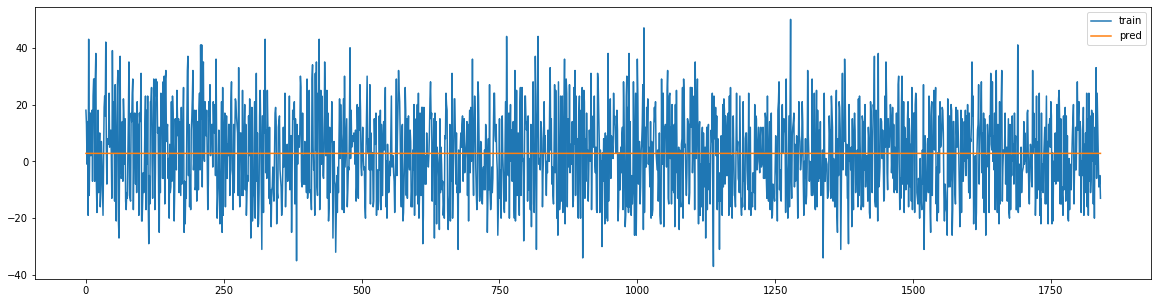

In [46]:
df = pd.DataFrame()
df['train'] = y_train
df['pred'] = y_pred_train_baseline
df = df.reset_index(drop=True)
df.plot(figsize=(20,5))

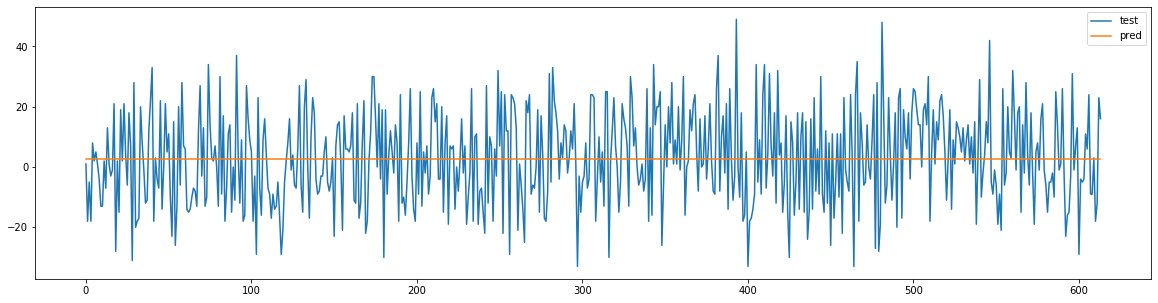

In [47]:
df = pd.DataFrame()
df['test'] = y_test
df['pred'] = y_pred_test_baseline
df = df.reset_index(drop=True)
df.plot(figsize=(20,5))

Pretty terrible - the MAE is almost equivalent to the standard devation.

### 3.2 Random forest accuracy

#### 3.2.1 On the balanced dataset

Now, we evaluate the Random Forest on the same data:

In [48]:
df = pd.DataFrame(
    [
        list(get_RFR_accuracy(rf, X_train_scaled_r, y_train)),
        list(get_RFR_accuracy(rf, X_test_scaled_r, y_test))
    ], 
    columns=['MAE','MSE','RMSE'], 
    index=['train','test']
)

print('RANDOM FOREST:')
display(df)

RANDOM FOREST:


,MAE,MSE,RMSE
train,3.348567,23.201947,4.816840
test,3.872136,26.376423,5.135798


To put the RMSE into context, it is usually divided by the range of the target value. However, because of the original data's very narrow distribution, and the dataset's wide range for the target value, I felt a stricter measure was necessary. 

So to normalise the RMSE, I didived it by the range of the standard deviation of the target value in the balanced dataset:

In [49]:
mae, mse, rmse = get_RFR_accuracy(rf, X_test_scaled_r, y_test)
std = balanced_dataset['Net Rate'].std()
normed_rmse = rmse/(2*std)
print('Normalised RMSE: %f' % normed_rmse)

Normalised RMSE: 0.166305


I interpreted this as a roughly 15% average error rate in context of the standard deviation, which is not too bad for a model using only approximately 2000 examples and 5 features.

TRAIN


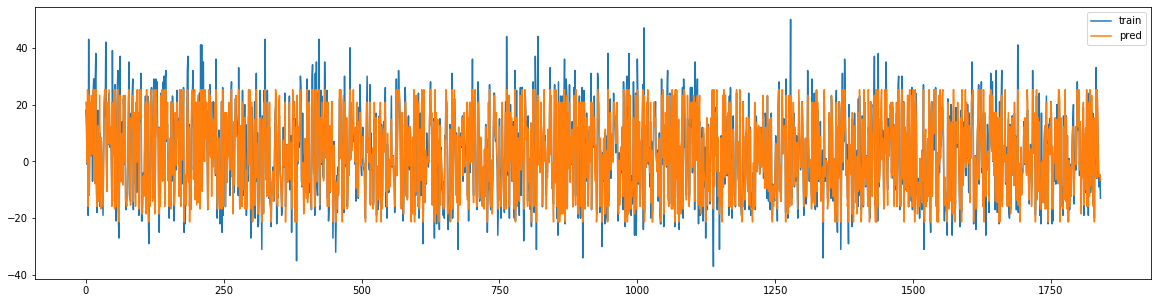

In [50]:
df = pd.DataFrame()
df['train'] = y_train
df['pred'] = rf.predict(X_train_scaled_r)
df = df.reset_index(drop=True)
df.plot(figsize=(20,5))
print('TRAIN')

TEST


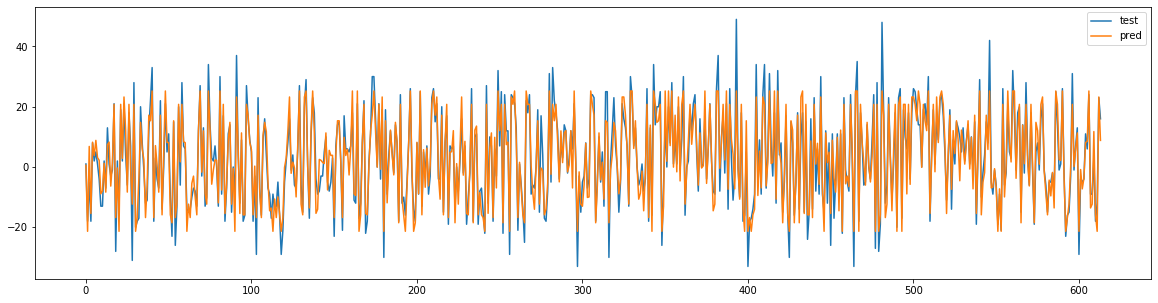

In [51]:
df = pd.DataFrame()
df['test'] = y_test
df['pred'] = rf.predict(X_test_scaled_r)
df = df.reset_index(drop=True)
df.plot(figsize=(20,5))
print('TEST')

The model seems to be tracking the target pretty well, but it seems to be struggling with targets greater than an absolute value greater than 25. These could be considered outliers - or we may be able to improve to the model by oversampling the under-represented classes - but I will leave that for a future improvement.

Since the original data distribution was modified, I wanted like to double check the model against the original data, with its unbalanced distribution. Of course, this means that some of the training data will be used to evaluate, along with testing data, which is a cardinal sin, so I did not regard this as a valid model performance metric, but nontheless I felt it was important to confirm against a large number of randomised samples from the original dataset.

#### 3.2.2 On original dataset

In [62]:
def paranoia_accuracy_evaluation(rf, scaler, dataset, n_tests, n_samples):
    mae = []
    mse = []
    rmse = []
    
    for i in tqdm_notebook(range(n_tests)):
        sample = dataset.sample(n_samples, replace=True)
        X = scaler.transform(sample[feature_cols_r])
        y = sample['Net Rate']
        
        mae_score, mse_score, rmse_score = get_RFR_accuracy(rf, X, y)

        mae.append(mae_score)
        mse.append(mse_score)
        rmse.append(rmse_score)
        
    return mae, mse, rmse

In [63]:
#mae, mse, rmse = paranoia_accuracy_evaluation(rf, scaler_r, dataset, 1000, 10000)

/home/tristan/.local/share/virtualenvs/codility-ml-test-tR3UURAZ/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [64]:
#df = pd.DataFrame(
#    [
#        [np.mean(mae), np.mean(mse), np.mean(rmse)],
#        [np.std(mae), np.std(mse), np.std(rmse)]
#    ], 
#    columns=['MAE','MSE','RMSE'], 
#    index=['mean','std']
#)

#df.to_csv('paranoia.csv')

In [65]:
paranoia = pd.read_csv('paranoia.csv')

In [66]:
display(paranoia)

,Unnamed: 0,MAE,MSE,RMSE
0,mean,2.050060,10.555891,3.248583
1,std,0.025056,0.331257,0.050988


The model seems to hold, with low standard deviation of the error across many sizeable tests.

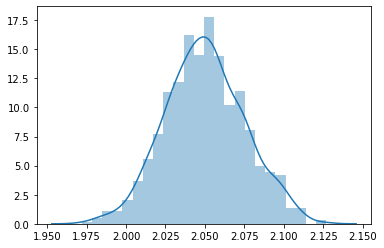

In [67]:
sns.distplot(mae)

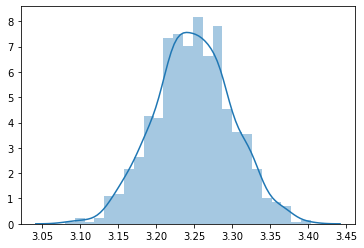

In [68]:
sns.distplot(rmse)

### 3.3 Neural Network accuracy

The wider neural network performed best of the NN configurations, and the loss curves are visualised below:

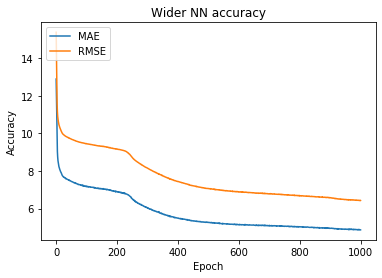

In [69]:
plt.plot(wider_nn_history.history['mean_absolute_error'])
plt.plot(np.sqrt(wider_nn_history.history['mean_squared_error']))
plt.title('Wider NN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['MAE', 'RMSE'], loc='upper left')
plt.show()

In [70]:
_, mae_train, mse_train = wider_nn_model.evaluate(X_train_scaled_r, y_train)
_, mae_test, mse_test = wider_nn_model.evaluate(X_test_scaled_r, y_test)

df = pd.DataFrame(
    [
        [mae_train, mse_train, np.sqrt(mse_train)],
        [mae_test, mse_test, np.sqrt(mse_test)]
    ], columns=['MAE','MSE','RMSE'], index=['train','test']
)

print('WIDER NEURAL NETWORK:')
display(df)

614/614 [==============================] - 0s 11us/step
WIDER NEURAL NETWORK:


,MAE,MSE,RMSE
train,4.845098,40.895199,6.394935
test,5.151094,44.075443,6.638934


In [71]:
std = balanced_dataset['Net Rate'].std()
normed_rmse = 6.635527/(2*std)
print('Normalised RMSE: %f' % normed_rmse)

Normalised RMSE: 0.214869


The neural network doesn't do too badly - with a normalised RMSE of roughly 0.2 , but the Random Forest still outperforms it slightly.

## Potential Improvements

The outlier values may be more sufficiently captured by including more data, especially of the under-represented net rate values, or by adding/designing additional features. Alternatively, up-sampling may be attempted.

Additional, better-balanced data may encourage performance in a neural network that could beat the Random Forest.

The algorithm to construct the dataset can certainly be accelerated by proper use of vectorised methods - it took 40 minutes to compile initially - luckily I only needed to do so twice.

## Conclusions

The Random Forest initially performed poorly when fed the original dataset. After re-evaluating the dataset, and finally the target value distribution, I realised the problem was not the model, but rather a dataset imbalance. Correcting the imbalance in the training set caused an immediate 40% improvement in the model. 

I found it interesting that the sinusoid time data ended up being so much more useful than the weather data, which barely featured at all. It may be that the weather features required some better feature engineering or a non-linear combination, but that was beyond the time scope of the challenge given the performance of the models with only the 5 features identified by the initial Random Forest.

The selected features make logical sense - the time of day is the biggest concern when considering vehicle traffic, and the geolocation could be a result of station distribution or service popularity across different cities.

Initially, when attempting to train the neural networks, once I reached the wider NN, I made it both wide and deep, and it failed to perform better than the other configurations, so I was going to abandon it - however when preparing for the full report, I decided to test only the wide configuration for completeness, and found it to be converging suprisingly well, albeit slowly. While not better than the Random Forest, it may hold potential given a better dataset and further feature engineering.

The Random Forest Regressor performance is satisfactory, after rigorous testing and comparisons, with an MAE of 3.872136 and an RMSE of 5.135798, although a reduction of the normalised RMSE to 5% (from roughly 15%) would be ideal.